In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [7]:
data = load_iris()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['Species'] = y

In [20]:
df

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [11]:
df = df[df['Species'] != 0][['sepal width (cm)', 'petal length (cm)', 'Species']]

In [12]:
df

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


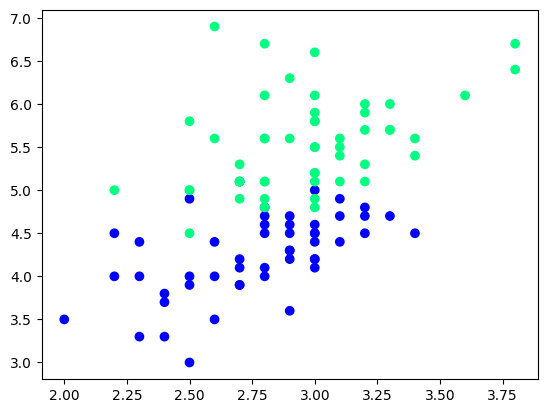

In [14]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['Species'], cmap='winter')

## Splitting Datasets

In [34]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [35]:
df_train

,sepal width (cm),petal length (cm),Species
121,2.8,4.9,2
76,2.8,4.8,1
95,3.0,4.2,1
78,2.9,4.5,1
122,2.8,6.7,2
97,2.9,4.3,1
133,2.8,5.1,2
77,3.0,5.0,1
128,2.8,5.6,2
54,2.8,4.6,1


In [40]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [50]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Bagging

## Data from Tree-1

In [51]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
122,2.8,6.7,2
54,2.8,4.6,1
128,2.8,5.6,2
78,2.9,4.5,1
76,2.8,4.8,1
122,2.8,6.7,2
133,2.8,5.1,2
122,2.8,6.7,2


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


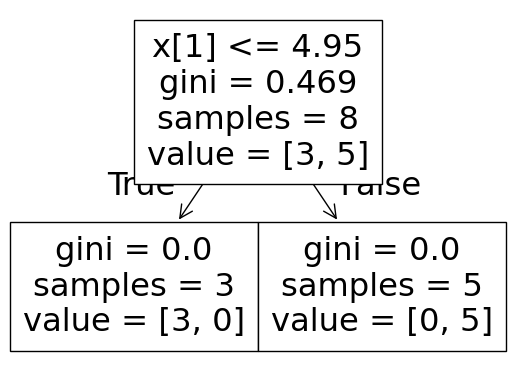

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


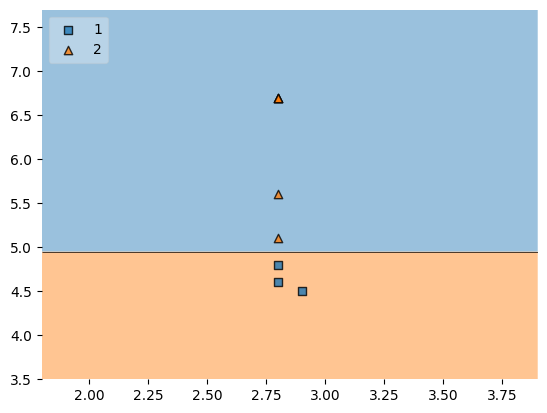

In [53]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X, y)

## Data from Tree-2

In [54]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
54,2.8,4.6,1
128,2.8,5.6,2
77,3.0,5.0,1
95,3.0,4.2,1
133,2.8,5.1,2
97,2.9,4.3,1
95,3.0,4.2,1
54,2.8,4.6,1


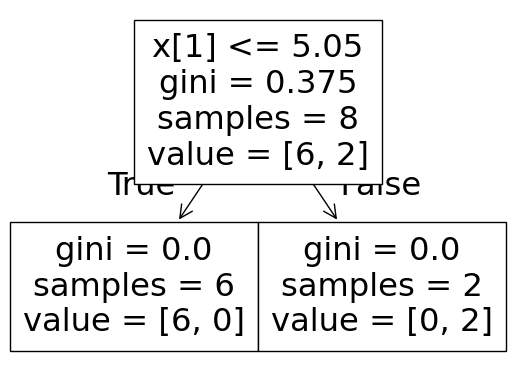

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


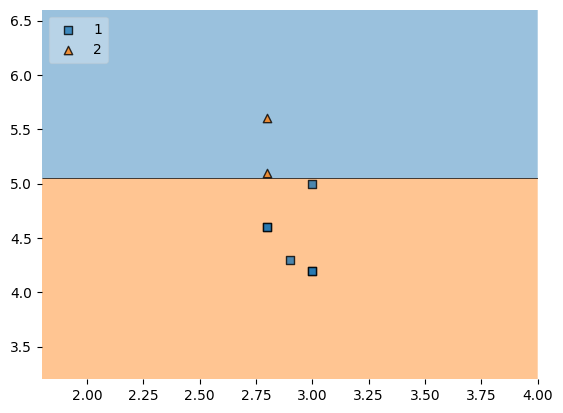

In [55]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

## Data from Tree-3

In [56]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
122,2.8,6.7,2
78,2.9,4.5,1
133,2.8,5.1,2
97,2.9,4.3,1
133,2.8,5.1,2
78,2.9,4.5,1
54,2.8,4.6,1
121,2.8,4.9,2


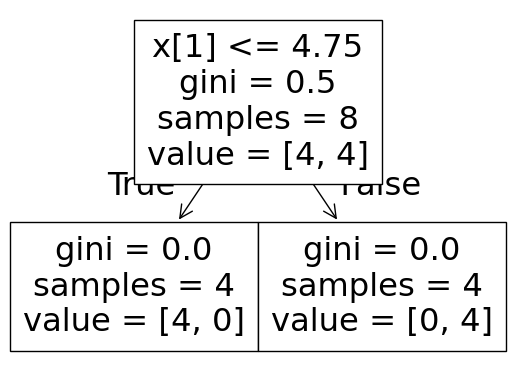

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


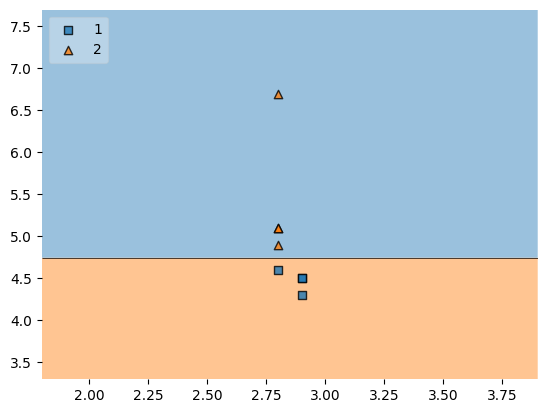

In [57]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

# Predict

In [58]:
df_test

,sepal width (cm),petal length (cm),Species
144,3.3,5.7,2
61,3.0,4.2,1
139,3.1,5.4,2
141,3.1,5.1,2
108,2.5,5.8,2


In [59]:
print("Predictor 1",dt_bag1.predict(np.array([3.3,5.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.3,5.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.3,5.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

<p> Row sampling without replacement </p>

In [63]:
df_train

,sepal width (cm),petal length (cm),Species
121,2.8,4.9,2
76,2.8,4.8,1
95,3.0,4.2,1
78,2.9,4.5,1
122,2.8,6.7,2
97,2.9,4.3,1
133,2.8,5.1,2
77,3.0,5.0,1
128,2.8,5.6,2
54,2.8,4.6,1


In [64]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Species
133,2.8,5.1,2
54,2.8,4.6,1
97,2.9,4.3,1
77,3.0,5.0,1
76,2.8,4.8,1
128,2.8,5.6,2
122,2.8,6.7,2
78,2.9,4.5,1


# Random Subspaces

<p>Column sampling</p>

In [69]:
data = load_iris()
X = data.data
y = data.target

df1 = pd.DataFrame(X, columns=data.feature_names)
df1['Species'] = y

In [70]:
df1.sample

<bound method NDFrame.sample of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Species
0                  5.1               3.5                1.4               0.2        0
1                  4.9               3.0                1.4               0.2        0
2                  4.7               3.2                1.3               0.2        0
3                  4.6               3.1                1.5               0.2        0
4                  5.0               3.6                1.4               0.2        0
..                 ...               ...                ...               ...      ...
145                6.7               3.0                5.2               2.3        2
146                6.3               2.5                5.0               1.9        2
147                6.5               3.0                5.2               2.0        2
148                6.2               3.4                5.4               2.3        2
149        

In [68]:
df1.sample(2,replace=True,axis=1)

,sepal width (cm),sepal width (cm)
0,3.5,3.5
1,3.0,3.0
2,3.2,3.2
3,3.1,3.1
4,3.6,3.6
...,...,...
145,3.0,3.0
146,2.5,2.5
147,3.0,3.0
148,3.4,3.4


# Random Patches

<p> Row and column sampling both combined</p>

In [71]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal length (cm),Species
41,4.5,0
126,6.2,2
50,7.0,1
100,6.3,2
109,7.2,2
64,5.6,1
51,6.4,1
19,5.1,0
